In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
ic = pd.read_csv("fraud.csv")
#importing the train and test file
pd.set_option('display.max_columns', None) # displays maximum columns
ic

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Exploratory Data Analysis

In [3]:
ic.isna().sum() #Checking for null values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

drop column '_c39' as it has no values

In [4]:
ic.drop('_c39',axis=1,inplace=True)

In [5]:
ic.shape

(1000, 39)

There are few '?' values in 'collision_type','property_damage' and 'police_report_available' columns. therefore we need to replace with null or nan values for handling them

In [6]:
ic=ic.replace(['?'],np.NaN)

In [7]:
ic.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

For collision_type we can replace the the null values with mode of that column

In [8]:
ic['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

Only mode of index '0' can be considered as index '1' is common for all the three collision type as you can see above

In [9]:
ic['collision_type'].fillna(ic['collision_type'].mode()[0], inplace=True)

For property_damage we can replace the the null values with 'NO' because it could be that they wasn't any property damage in the first place

In [10]:
ic['property_damage'].mode()

0    NO
dtype: object

Also the mode of the column is also 'NO'

In [11]:
ic['property_damage'].fillna(ic['property_damage'].mode()[0], inplace=True)

Similarly, for police_report_available we can replace the the null values with 'NO' because it could be that they haven't reported.

In [12]:
ic['police_report_available'].mode()

0    NO
dtype: object

SImilarly here also the mode of the column is also 'NO'

In [13]:
ic['police_report_available'].fillna(ic['police_report_available'].mode()[0],inplace=True)

In [14]:
ic.isnull().sum() #rechecking for null values

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

now we have removed all the null values

In [15]:
ic.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

we can even drop 'policy_number' as each policy number is unique 

In [16]:
ic.drop('policy_number',axis=1,inplace=True)

In [17]:
ic.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554


we can see that the correlation is high between few independent variables. Therefore, this is a multicollinearity problem

we can drop 'policy_bind_date' as it is insignificant  

In [18]:
ic.drop('policy_bind_date',axis=1,inplace=True)

we can drop 'incident_location' as it each value is unique 

In [19]:
ic.drop('incident_location',axis=1,inplace=True)

'incident_date' is in object type (time stamp), we have to convert into months and days.

In [20]:
ic.drop('auto_model',axis=1,inplace=True)

In [21]:
ic['incident_date']= pd.to_datetime(ic['incident_date'])
ic['incidentmonth'] = ic['incident_date'].dt.month
ic['incidentday'] = ic['incident_date'].dt.day


# we can drop 'incident_date' as we have all the information in 'incidentmonth' and 'incidentday'

ic.drop('incident_date',axis=1,inplace=True)

In [22]:
ic.dtypes # checking data types of all features

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

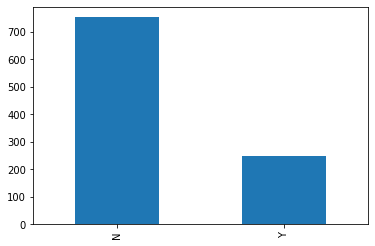

In [23]:
ic['fraud_reported'].value_counts().plot.bar()
plt.show()

Bar plot of fraud reported i yes or no

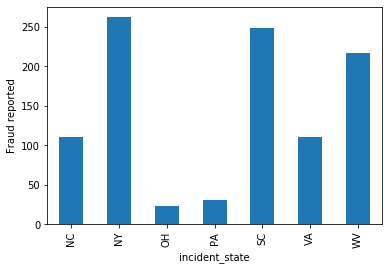

In [24]:
P=ic.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
P.set_ylabel('Fraud reported')
plt.show()

we can see fraud reported in different states

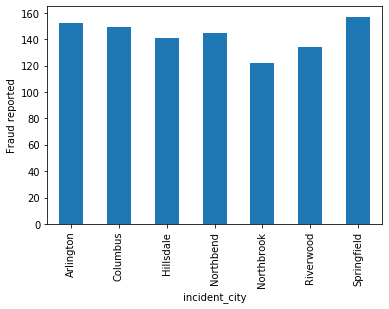

In [25]:
P=ic.groupby('incident_city').fraud_reported.count().plot.bar(ylim=0)
P.set_ylabel('Fraud reported')
plt.show()

we can see that highest fraud reported is in springfield

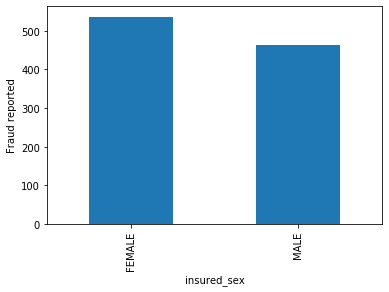

In [26]:
P=ic.groupby('insured_sex').fraud_reported.count().plot.bar(ylim=0)
P.set_ylabel('Fraud reported')
plt.show()

we can see that highest fraud reported is by female

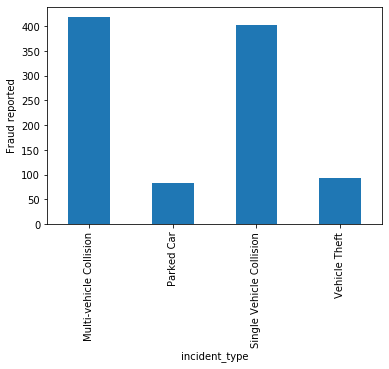

In [27]:
P=ic.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
P.set_ylabel('Fraud reported')
plt.show()

we can see that fraud reported for Multi_vehicle Collision is highest

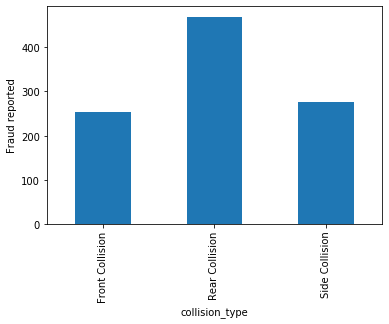

In [28]:
P=ic.groupby('collision_type').fraud_reported.count().plot.bar(ylim=0)
P.set_ylabel('Fraud reported')
plt.show()

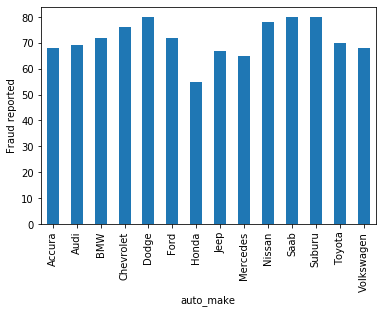

In [29]:
P=ic.groupby('auto_make').fraud_reported.count().plot.bar(ylim=0)
P.set_ylabel('Fraud reported')
plt.show()

fraud reported based on auto_make

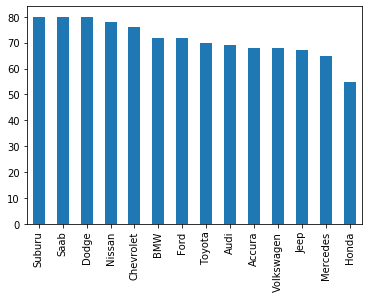

In [30]:
ic['auto_make'].value_counts().plot.bar()
plt.show()
#barplot of Value counts of auto_make

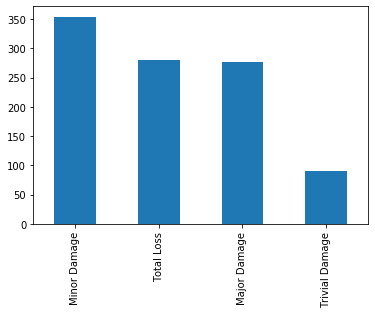

In [31]:
ic['incident_severity'].value_counts().plot.bar()
plt.show()
#barplot of incident_severity

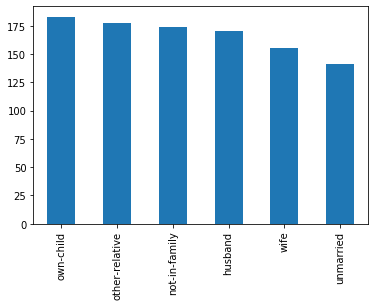

In [32]:
ic['insured_relationship'].value_counts().plot.bar()
plt.show()
#barplot of insured_relationship

# Normalising the numerical data

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

ic[['months_as_customer', 'age','policy_deductable', 'policy_annual_premium', 'umbrella_limit',
      'insured_zip','capital-gains', 'capital-loss', 'total_claim_amount','injury_claim', 'property_claim', 
      'vehicle_claim']]=scaler.fit_transform(ic[['months_as_customer', 'age','policy_deductable', 'policy_annual_premium', 'umbrella_limit',
      'insured_zip','capital-gains', 'capital-loss', 'total_claim_amount','injury_claim', 'property_claim', 
      'vehicle_claim']])

In [34]:
ic

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incidentmonth,incidentday
0,0.684760,0.644444,OH,250/500,0.333333,0.603112,0.090909,0.188769,MALE,MD,craft-repair,sleeping,husband,0.530348,1.000000,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,0.622801,0.303497,0.550063,0.654296,Saab,2004,Y,1,25
1,0.475992,0.511111,IN,250/500,1.000000,0.473214,0.545455,0.199478,MALE,MD,machine-op-inspct,reading,other-relative,0.000000,1.000000,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,0.043285,0.036364,0.032953,0.043276,Mercedes,2007,Y,1,21
2,0.279749,0.222222,OH,100/300,1.000000,0.606972,0.545455,0.002766,FEMALE,PhD,sales,board-games,own-child,0.349254,1.000000,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,0.300906,0.358974,0.162653,0.289722,Dodge,2007,N,2,22
3,0.534447,0.488889,IL,250/500,1.000000,0.608582,0.636364,0.932699,FEMALE,PhD,armed-forces,board-games,unmarried,0.486567,0.438344,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,0.551298,0.295571,0.267850,0.637187,Chevrolet,2014,Y,10,1
4,0.475992,0.555556,IL,500/1000,0.333333,0.712760,0.636364,0.946264,MALE,Associate,sales,board-games,unmarried,0.656716,0.585959,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,0.055739,0.060606,0.027461,0.056359,Accura,2009,N,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.422222,OH,500/1000,0.333333,0.543574,0.090909,0.006209,FEMALE,Masters,craft-repair,paintball,unmarried,0.000000,1.000000,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NO,0.758579,0.813054,0.368399,0.767015,Honda,2006,N,2,22
996,0.594990,0.488889,IL,100/300,0.333333,0.621622,0.090909,0.933013,FEMALE,PhD,prof-specialty,sleeping,wife,0.705473,1.000000,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NO,0.943912,0.842890,0.763836,0.908919,Volkswagen,2015,N,1,24
997,0.271399,0.333333,OH,250/500,0.000000,0.588604,0.363636,0.066505,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,0.349254,1.000000,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,NO,2,3,YES,0.587006,0.349650,0.316857,0.659580,Suburu,1996,N,1,23
998,0.956159,0.955556,IL,500/1000,1.000000,0.572145,0.545455,0.060831,MALE,Associate,handlers-cleaners,base-jumping,wife,0.000000,1.000000,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,NO,0,1,YES,0.408291,0.243357,0.220532,0.458800,Audi,1998,N,2,26


# Label Encoding

Converting Categorical Variables to numerical

In [35]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','number_of_vehicles_involved','property_damage','police_report_available','auto_make','auto_year','fraud_reported']:
    ic[i]=label.fit_transform(ic[i])


In [36]:
ic

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incidentmonth,incidentday
0,0.684760,0.644444,2,1,0.333333,0.603112,0.090909,0.188769,1,4,2,17,0,0.530348,1.000000,2,2,0,4,4,1,5,0,1,1,2,1,0.622801,0.303497,0.550063,0.654296,10,9,1,1,25
1,0.475992,0.511111,1,1,1.000000,0.473214,0.545455,0.199478,1,4,6,15,2,0.000000,1.000000,3,1,1,4,5,5,8,0,0,0,0,0,0.043285,0.036364,0.032953,0.043276,8,12,1,1,21
2,0.279749,0.222222,2,0,1.000000,0.606972,0.545455,0.002766,0,6,11,2,3,0.349254,1.000000,0,1,1,4,1,1,7,2,0,2,3,0,0.300906,0.358974,0.162653,0.289722,4,12,0,2,22
3,0.534447,0.488889,0,1,1.000000,0.608582,0.636364,0.932699,0,6,1,2,4,0.486567,0.438344,2,0,0,4,2,0,5,0,0,1,2,0,0.551298,0.295571,0.267850,0.637187,3,19,1,10,1
4,0.475992,0.555556,0,2,0.333333,0.712760,0.636364,0.946264,1,0,11,2,4,0.656716,0.585959,3,1,1,2,1,0,20,0,0,0,1,0,0.055739,0.060606,0.027461,0.056359,0,14,0,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.422222,2,2,0.333333,0.543574,0.090909,0.006209,0,5,2,13,4,0.000000,1.000000,2,0,1,1,0,4,20,0,1,0,1,0,0.758579,0.813054,0.368399,0.767015,6,11,0,2,22
996,0.594990,0.488889,0,0,0.333333,0.621622,0.090909,0.933013,0,6,9,17,5,0.705473,1.000000,2,1,0,1,4,3,23,0,1,2,3,0,0.943912,0.842890,0.763836,0.908919,13,20,0,1,24
997,0.271399,0.333333,2,1,0.000000,0.588604,0.363636,0.066505,0,5,1,3,2,0.349254,1.000000,0,2,1,4,0,0,4,2,0,2,3,1,0.587006,0.349650,0.316857,0.659580,11,1,0,1,23
998,0.956159,0.955556,0,2,1.000000,0.572145,0.545455,0.060831,1,0,5,0,5,0.000000,1.000000,2,1,0,3,1,0,2,0,0,0,1,1,0.408291,0.243357,0.220532,0.458800,1,3,0,2,26


In [37]:
ic.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incidentmonth,incidentday
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,-0.000292,0.020544,0.024659,-0.011092
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.001354,0.012143,0.023404,-0.006131
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.002114,0.029432,0.023643,0.014745
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.020641,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,-0.033082,-0.037190,-0.011794,-0.004156
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,0.026105,0.014817,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.049226,-0.014480,0.021559,0.014835
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.009893,0.058622,0.042409,-0.021716
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,-0.010840,-0.016882,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,0.023861,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,-0.032736,0.019368,0.005461,0.019095
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.028247,0.030873,0.024227,-0.007280
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.019230,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.0

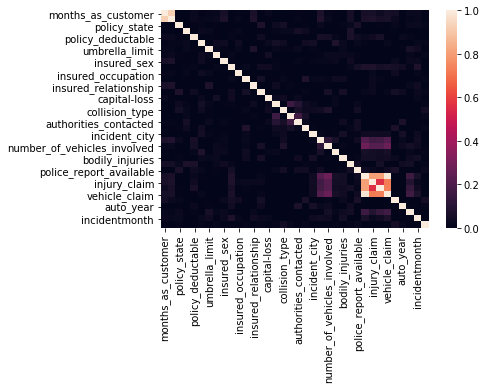

In [38]:
sns.heatmap(ic.corr(), vmin=0, vmax=1)

In [39]:
ic.corr()["fraud_reported"].sort_values(ascending=False) 
#identifying important features with target varible

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
incidentmonth                  0.014495
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
policy_annual_premium         -0.014480
capital-loss                  -0.014863
collision_type                -0.017315


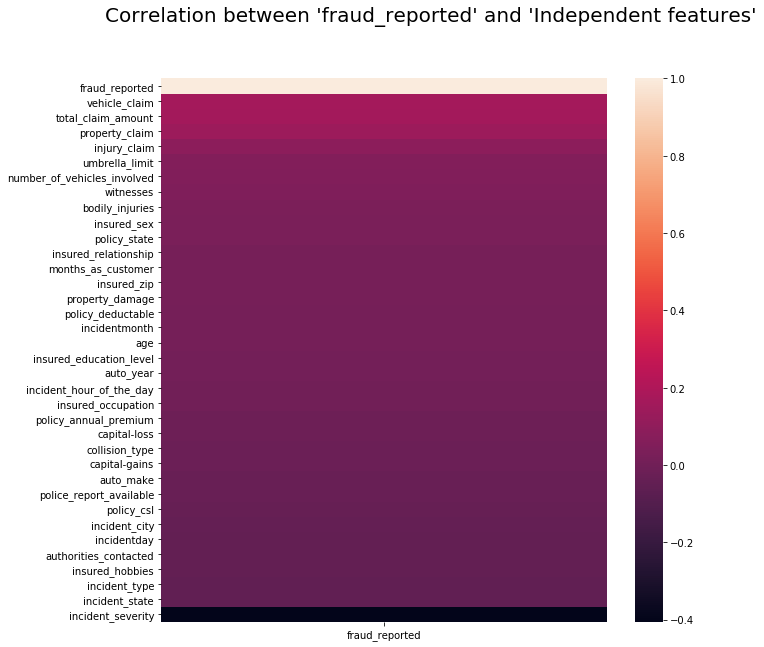

In [40]:
corr, b = plt.subplots(figsize=(10,10))
corr.suptitle("Correlation between 'fraud_reported' and 'Independent features'",fontsize=20)
b=sns.heatmap(ic.corr()[["fraud_reported"]].sort_values("fraud_reported"));
b.invert_yaxis()
#important features

# Splitting of train data into Independent and Target variables

In [41]:
ind=ic.drop("fraud_reported",axis=1)
tar=ic["fraud_reported"]
#splitting individual and target variable in ind and tar

In [42]:
from sklearn.model_selection import train_test_split

#splitting into training and testing data set
ind_train,ind_test,tar_train,tar_test=train_test_split(ind,tar,test_size=0.25,random_state=43)
print(ind_train.shape)
print(ind_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(750, 35)
(250, 35)
(750,)
(250,)


# Data Modeling and prediciton

In [43]:
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import PowerTransformer
from  sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [44]:
# LogisticRegression, GaussianNB, Supportvectorclassifier, RandomForestClassifier, AdaBoostClassifier,DecisionTreeClassifier
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier()


In [45]:
model=[lg,gnb,sv,rf,ad,knn,dtc]

for m in model:
    m.fit(ind_train,tar_train)
    predict=m.predict(ind_test)
    print('accuracy score of:',m)
    print(accuracy_score(tar_test,predict))
    print(confusion_matrix(tar_test,predict))
    print(classification_report(tar_test,predict))
    score=cross_val_score(m,ind,tar,cv=5)
    print(score)
    print(score.mean())

accuracy score of: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.76
[[172  13]
 [ 47  18]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       185
           1       0.58      0.28      0.38        65

    accuracy                           0.76       250
   macro avg       0.68      0.60      0.61       250
weighted avg       0.73      0.76      0.73       250

[0.785 0.76  0.715 0.795 0.78 ]
0.767
accuracy score of: GaussianNB(priors=None, var_smoothing=1e-09)
0.736
[[149  36]
 [ 30  35]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       185
           1       0.49      0.54      0.51        65

    a

In [46]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
a=[]
acc=[]
strd=[]
classifiers=['lg','gnb','sv','rf','ad','knn','dtc']
models=[lg,gnb,sv,rf,ad,knn,dtc]
for i in models:
    model = i
    cv_result = cross_val_score(model,ind,tar, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    a.append(cv_result.mean())
    strd.append(cv_result.std())
    acc.append(cv_result)
nd=pd.DataFrame({'CV Mean':a,'Std':strd},index=classifiers)       
nd

,CV Mean,Std
lg,0.771,0.034771
gnb,0.719,0.053749
sv,0.753,0.032573
rf,0.777,0.044733
ad,0.801,0.054672
knn,0.720,0.052536
dtc,0.767,0.047339


According to Cross val score and accuracy we can see that the DecisionTreeClassifier has the least difference between Accuracy and Cross val score, therefore we select DecisionTreeClassifier model

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],'max_depth':[5,10,50,100]}
gs=GridSearchCV(dtc,parameters)
gs.fit(ind_train,tar_train)

sorted(gs.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [48]:
print(gs.best_params_)
best_result=gs.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 5}
0.8320000000000001


We can see that the accuracy score has increased.

# AUC ROC CURVE

In [49]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [50]:
y_pred_prob=dtc.predict_proba(ind_test)[:,1]

In [51]:
y_pred_prob


array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0.

In [52]:
fpr,tpr,thresholds=roc_curve(tar_test,y_pred_prob)

In [53]:
fpr # false Positive Rate

array([0.        , 0.08648649, 1.        ])

In [54]:
tpr #True Positive Rate

array([0.        , 0.58461538, 1.        ])

In [55]:
aur_score=roc_auc_score(tar_test,dtc.predict(ind_test))


In [56]:
aur_score # AUC ROC score

0.7490644490644491

we can also see that the AUC score is good

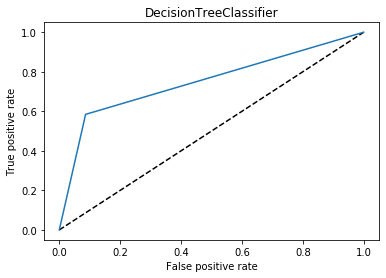

In [57]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("DecisionTreeClassifier")
plt.show()

we can see that the area of curve falls under True Positive Rate

Therefore, we can save this model

In [58]:
import joblib
joblib.dump(dtc,'Customer Churn Analysis.obj') #save the model as object file


['Customer Churn Analysis.obj']